In [1]:
import geopandas as gpd

In [2]:
countyShape = gpd.read_file('/Users/vince/Downloads/cb_2018_us_county_20m.shp')

In [3]:
countyShape.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,37,017,01026336,0500000US37017,37017,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850..."
1,37,167,01025844,0500000US37167,37167,Stanly,06,1023370459,25242751,"POLYGON ((-80.49737 35.20210, -80.29542 35.502..."
2,39,153,01074088,0500000US39153,39153,Summit,06,1069181981,18958267,"POLYGON ((-81.68699 41.13596, -81.68495 41.277..."
3,42,113,01213687,0500000US42113,42113,Sullivan,06,1165338428,6617028,"POLYGON ((-76.81373 41.59003, -76.22014 41.541..."
4,48,459,01384015,0500000US48459,48459,Upshur,06,1509910100,24878888,"POLYGON ((-95.15274 32.66095, -95.15211 32.902..."


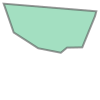

In [4]:
countyShape.iloc[3]['geometry']

In [5]:
import pandas as pd
import numpy as np
# Read in state population data and examine
countyCase = pd.read_csv('/Users/vince/Documents/covid-19-data/us-counties.csv')
countyCase = countyCase.loc[~countyCase['state'].isin(['Alaska', 'Hawaii','Puerto Rico'])]
countyCaseCurrent = countyCase.groupby(by=[countyCase['state'],countyCase['county'],countyCase['fips']]).agg({'date':'max','cases':'max','deaths':'max'})
countyCaseCurrent = countyCaseCurrent.reset_index()
countyCaseCurrent.head()

,state,county,fips,date,cases,deaths
0,Alabama,Autauga,1001.0,2020-03-30,7,0
1,Alabama,Baldwin,1003.0,2020-03-30,18,0
2,Alabama,Bibb,1007.0,2020-03-30,2,0
3,Alabama,Blount,1009.0,2020-03-30,5,0
4,Alabama,Bullock,1011.0,2020-03-30,3,0


In [6]:
stateCase = pd.read_csv('/Users/vince/Documents/covid-19-data/us-states.csv')
stateCase = stateCase.loc[~stateCase['state'].isin(['Alaska', 'Hawaii','Puerto Rico'])]
stateCaseCurrent = stateCase.groupby(by=[stateCase['state'],stateCase['fips']]).agg({'date':'max','cases':'max','deaths':'max'})
stateCaseCurrent = stateCaseCurrent.reset_index()
stateCaseCurrent

,state,fips,date,cases,deaths
0,Alabama,1,2020-03-30,947,11
1,Arizona,4,2020-03-30,1169,20
2,Arkansas,5,2020-03-30,508,7
3,California,6,2020-03-30,7421,146
4,Colorado,8,2020-03-30,2628,51
5,Connecticut,9,2020-03-30,2571,36
6,Delaware,10,2020-03-30,264,7
7,District of Columbia,11,2020-03-30,495,9
8,Florida,12,2020-03-30,5694,71
9,Georgia,13,2020-03-30,3032,102


In [7]:
#merge data
countyShape['STATEFP']=countyShape['STATEFP'].values.astype(np.int64)
countyShape['COUNTYFP']=countyShape['COUNTYFP'].values.astype(np.int64)
stateCaseCurrent['fips']=stateCaseCurrent['fips'].values.astype(np.int64)
#countyCaseCurrent['fips']=countyCase['fips'].values.astype(np.int64)
cs = countyShape.merge(stateCaseCurrent, left_on='STATEFP', right_on='fips', how='inner')
css = cs.merge(countyCaseCurrent, left_on=['state','NAME'], right_on=['state','county'], how='inner')

In [8]:
css.count()

STATEFP     2033
COUNTYFP    2033
COUNTYNS    2033
AFFGEOID    2033
GEOID       2033
NAME        2033
LSAD        2033
ALAND       2033
AWATER      2033
geometry    2033
state       2033
fips_x      2033
date_x      2033
cases_x     2033
deaths_x    2033
county      2033
fips_y      2033
date_y      2033
cases_y     2033
deaths_y    2033
dtype: int64

In [9]:
output = css[['state','county','geometry','cases_y','deaths_y']]

In [10]:
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure


from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

In [11]:
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = output.to_json())

In [12]:
# Create figure object.
"""
z = figure(title = 'Lead Levels in Water Samples, 2018', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')
z.xgrid.grid_line_color = None
z.ygrid.grid_line_color = None
# Add patch renderer to figure.
test = z.patches('xs','ys', source = geosource,
                   fill_color = None,
                   line_color = 'red', 
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
z.add_tools(HoverTool(renderers = [test],
                      tooltips = [('state','@state'),
                                  ('county','@county'),
                                  ('cases','@cases_y'),
                                ('deaths','@deaths_y')]
                     )
           )
show(z)
"""

"\nz = figure(title = 'Lead Levels in Water Samples, 2018', \n           plot_height = 600 ,\n           plot_width = 950, \n           toolbar_location = 'below',\n           tools = 'pan, wheel_zoom, box_zoom, reset')\nz.xgrid.grid_line_color = None\nz.ygrid.grid_line_color = None\n# Add patch renderer to figure.\ntest = z.patches('xs','ys', source = geosource,\n                   fill_color = None,\n                   line_color = 'red', \n                   line_width = 0.25, \n                   fill_alpha = 1)\n# Create hover tool\nz.add_tools(HoverTool(renderers = [test],\n                      tooltips = [('state','@state'),\n                                  ('county','@county'),\n                                  ('cases','@cases_y'),\n                                ('deaths','@deaths_y')]\n                     )\n           )\nshow(z)\n"

In [15]:
# Define color palettes
palette = brewer['BuGn'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 1000)
# Define custom tick labels for color bar.
tick_labels = {'0': '0', '5': '5',
 '10':'10', '50':'50',
 '100':'100', '200':'200',
 '500':'500', '1000':'1000+'}
# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',
                     major_label_overrides = tick_labels)

In [17]:
# Create figure object.
geosource1 = GeoJSONDataSource(geojson = output.to_json())
p2 = figure(title = 'Lead Levels in Water Samples, 2018', 
           plot_height = 600, plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')
p2.xgrid.grid_line_color = None
p2.ygrid.grid_line_color = None
# Add patch renderer to figure.
test3 = p2.patches('xs','ys', source = geosource1,
                   fill_color = {'field' :'cases_y',
                                 'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
p2.add_tools(HoverTool(renderers = [test3],
                      tooltips = [('state','@state'),
                                  ('county','@county'),
                                  ('cases','@cases_y'),
                                ('deaths','@deaths_y')]))
# Specify layout
p2.add_layout(color_bar, 'below')
show(p2)